In [ ]:
# Import required module
import os

# Create main project directories in Colab's RAM
project_root = "/content/fruit_veg_detection"
data_dir = os.path.join(project_root, "data")
models_dir = os.path.join(project_root, "models")
deploy_dir = os.path.join(project_root, "deployment")

os.makedirs(data_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(deploy_dir, exist_ok=True)

# Install all required libraries
!pip install -q kaggle opencv-python tensorflow scikit-learn matplotlib seaborn pillow


##**Data Loading**

In [ ]:
# ✅ STEP 2: Download datasets using Kaggle API

from google.colab import files
import os

# Upload kaggle.json for API authentication
files.upload()  # Ensure kaggle.json is selected

# Setup Kaggle credentials
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Move to Colab temporary storage
%cd /content

# Download datasets (temporary storage only)
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

# Unzip into /content
!unzip -o -q fruit-and-vegetable-disease-healthy-vs-rotten.zip -d disease_dataset
!unzip -o -q fresh-and-stale-classification.zip -d stale_dataset


# Confirm directory structure
print("📁 disease_dataset folders:")
!ls "disease_dataset"

print("\n📁 stale_dataset folders:")
!ls "stale_dataset"


Saving kaggle.json to kaggle.json
/content
Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0
100% 4.75G/4.77G [01:06<00:00, 37.0MB/s]
100% 4.77G/4.77G [01:06<00:00, 76.9MB/s]
Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
 99% 2.82G/2.84G [00:35<00:00, 58.2MB/s]
100% 2.84G/2.84G [00:35<00:00, 85.8MB/s]
📁 disease_dataset folders:
'Fruit And Vegetable Diseases Dataset'

📁 stale_dataset folders:
dataset


## **Data Merging & Preparation**

In [ ]:
import os, shutil, glob
from sklearn.model_selection import train_test_split

# Define dataset source paths (from Colab temp)
disease_path = '/content/disease_dataset/Fruit And Vegetable Diseases Dataset'
stale_path = '/content/stale_dataset/dataset/Train'

# Define combined dataset path (temporary RAM)
combined_path = '/content/combined_dataset'
os.makedirs(combined_path, exist_ok=True)

# ✅ Step 1: Copy class folders into /content/combined_dataset
def copy_all_classes(src):
    for class_name in os.listdir(src):
        src_class = os.path.join(src, class_name)
        dst_class = os.path.join(combined_path, class_name)
        if os.path.isdir(src_class):
            os.makedirs(dst_class, exist_ok=True)
            for file in os.listdir(src_class):
                shutil.copy(os.path.join(src_class, file), dst_class)

copy_all_classes(disease_path)
copy_all_classes(stale_path)

print("✅ Combined dataset created at:", combined_path)
print("Class folders:", os.listdir(combined_path))

# ✅ Step 2: Create train, val, test folders (temporary storage)
train_path = '/content/train'
val_path = '/content/val'
test_path = '/content/test'

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# ✅ Step 3: Split into train, val, test
def split_and_copy(source_folder, train_folder, val_folder, test_folder, split_ratios=(0.7, 0.15, 0.15)):
    for class_name in os.listdir(source_folder):
        class_dir = os.path.join(source_folder, class_name)
        if not os.path.isdir(class_dir): continue
        files = glob.glob(os.path.join(class_dir, '*'))

        # Train / temp split
        train_files, temp = train_test_split(files, test_size=(1 - split_ratios[0]), random_state=42)
        # Temp split into val / test
        val_files, test_files = train_test_split(temp, test_size=(split_ratios[2]/(split_ratios[1]+split_ratios[2])), random_state=42)

        for dst_files, dst_folder in zip([train_files, val_files, test_files], [train_folder, val_folder, test_folder]):
            dst_class_folder = os.path.join(dst_folder, class_name)
            os.makedirs(dst_class_folder, exist_ok=True)
            for file in dst_files:
                shutil.copy(file, dst_class_folder)

split_and_copy(combined_path, train_path, val_path, test_path)

# ✅ Step 4: Print folder-wise class file counts
for folder in [train_path, val_path, test_path]:
    print(f"\n📁 {folder}:")
    for cls in os.listdir(folder):
        count = len(os.listdir(os.path.join(folder, cls)))
        print(f"  {cls}: {count} files")


✅ Combined dataset created at: /content/combined_dataset
Class folders: ['rottenokra', 'freshcapsicum', 'Bellpepper__Healthy', 'Guava__Rotten', 'rottenbanana', 'Banana__Rotten', 'Orange__Rotten', 'Grape__Healthy', 'Jujube__Healthy', 'freshapples', 'rottenapples', 'Pomegranate__Healthy', 'Potato__Rotten', 'freshoranges', 'Carrot__Rotten', 'rottenbittergroud', 'Apple__Healthy', 'Mango__Healthy', 'Tomato__Rotten', 'freshtomato', 'Orange__Healthy', 'Strawberry__Rotten', 'Apple__Rotten', 'Grape__Rotten', 'Jujube__Rotten', 'Guava__Healthy', 'rottencucumber', 'Cucumber__Healthy', 'freshcucumber', 'Carrot__Healthy', 'freshpotato', 'freshbanana', 'freshokra', 'Potato__Healthy', 'rottenoranges', 'rottenpotato', 'rottencapsicum', 'Pomegranate__Rotten', 'Tomato__Healthy', 'rottentomato', 'Strawberry__Healthy', 'freshbittergroud', 'Bellpepper__Rotten', 'Mango__Rotten', 'Cucumber__Rotten', 'Banana__Healthy']

📁 /content/train:
  rottenokra: 236 files
  freshcapsicum: 692 files
  Bellpepper__Healthy:

**Remove Currupt Images(IF ANY)**

In [ ]:
from PIL import Image
import os

def remove_corrupt_images(folder):
    removed = 0
    for cls in os.listdir(folder):
        class_path = os.path.join(folder, cls)
        if not os.path.isdir(class_path): continue
        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            try:
                img = Image.open(img_path)
                img.verify()  # validate file
            except (IOError, SyntaxError):
                os.remove(img_path)
                removed += 1
    print(f"🧹 Removed {removed} corrupt images from: {folder}")

remove_corrupt_images('/content/train')
remove_corrupt_images('/content/val')
remove_corrupt_images('/content/test')


🧹 Removed 0 corrupt images from: /content/train
🧹 Removed 0 corrupt images from: /content/val
🧹 Removed 0 corrupt images from: /content/test


## **EDA**

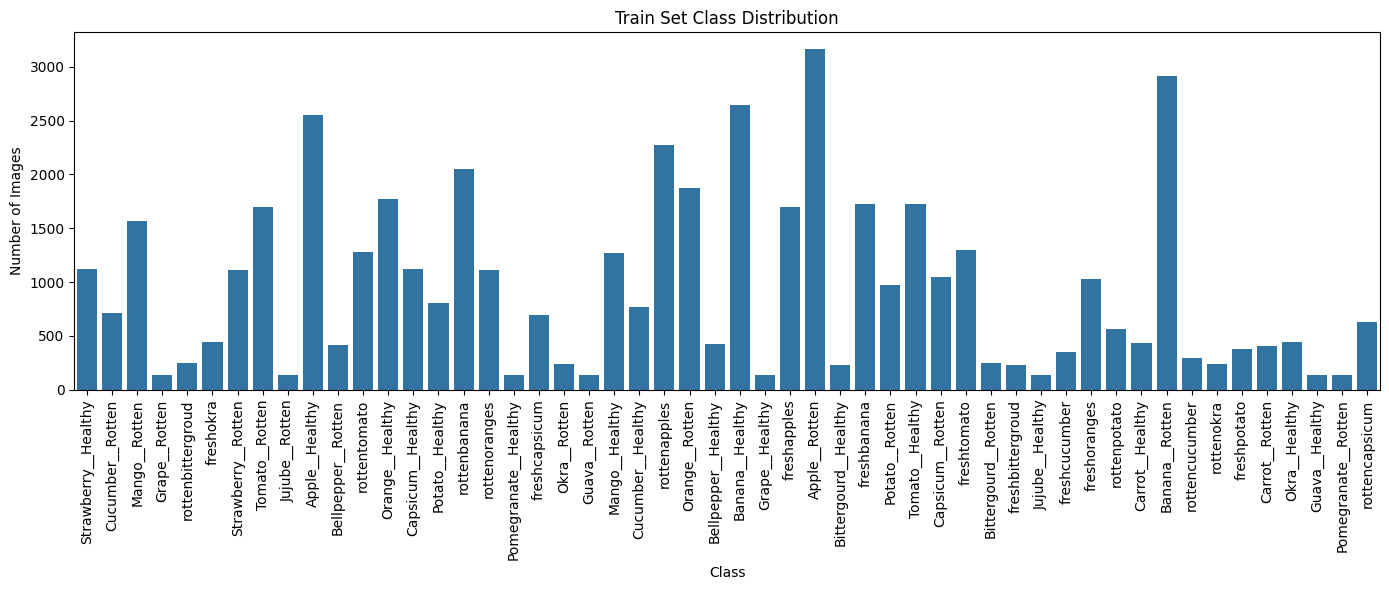

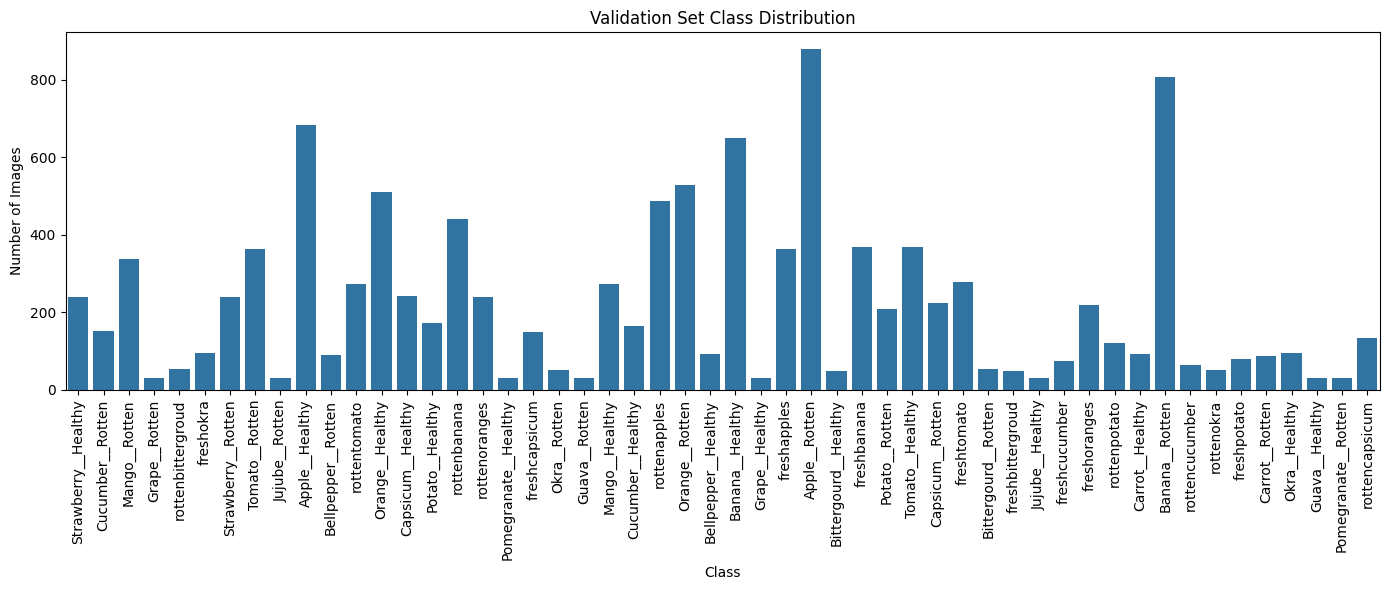

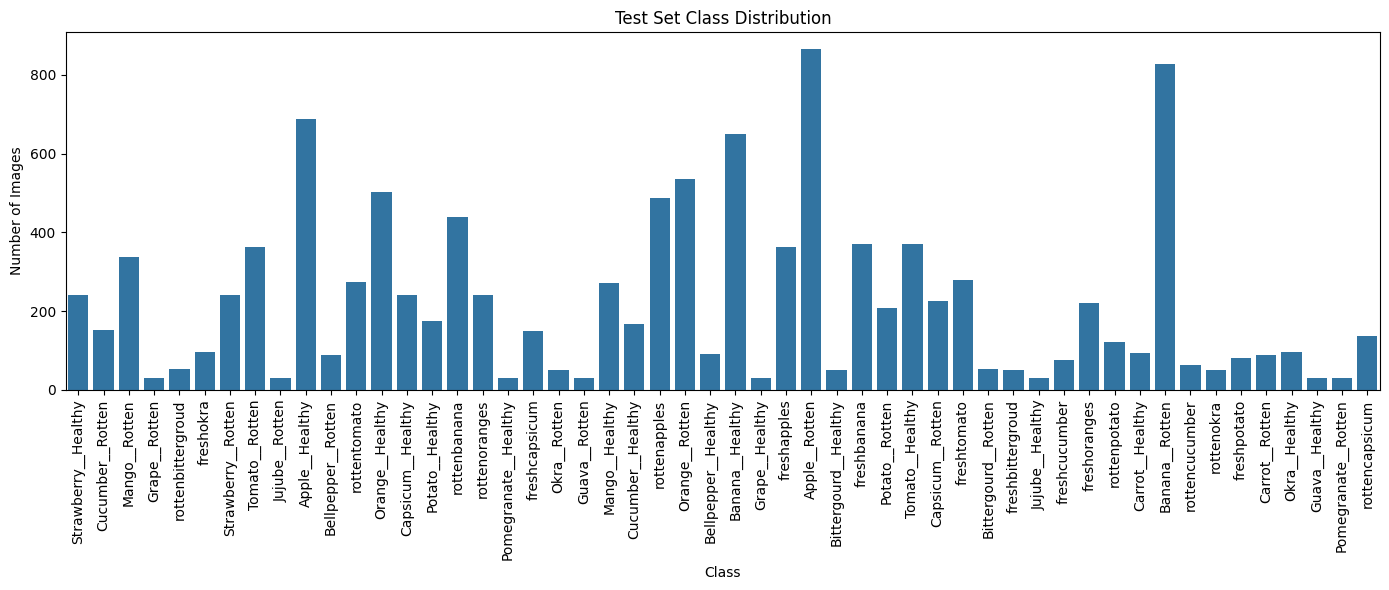

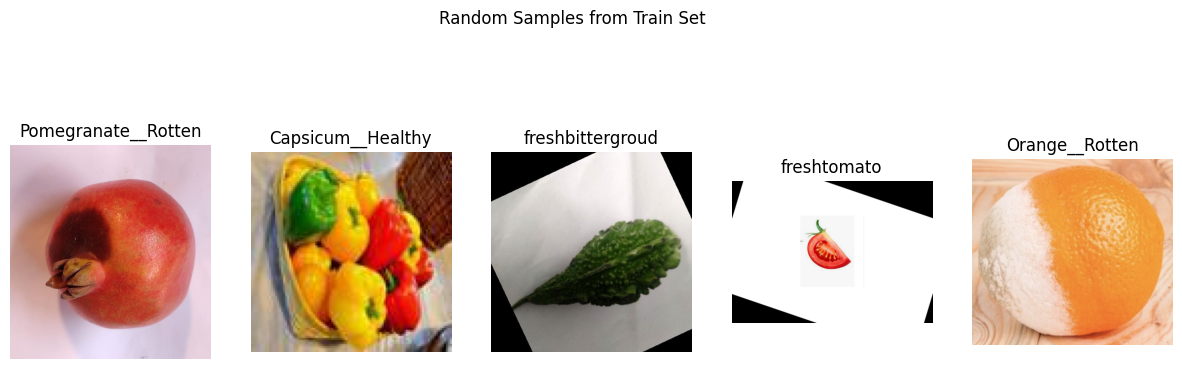

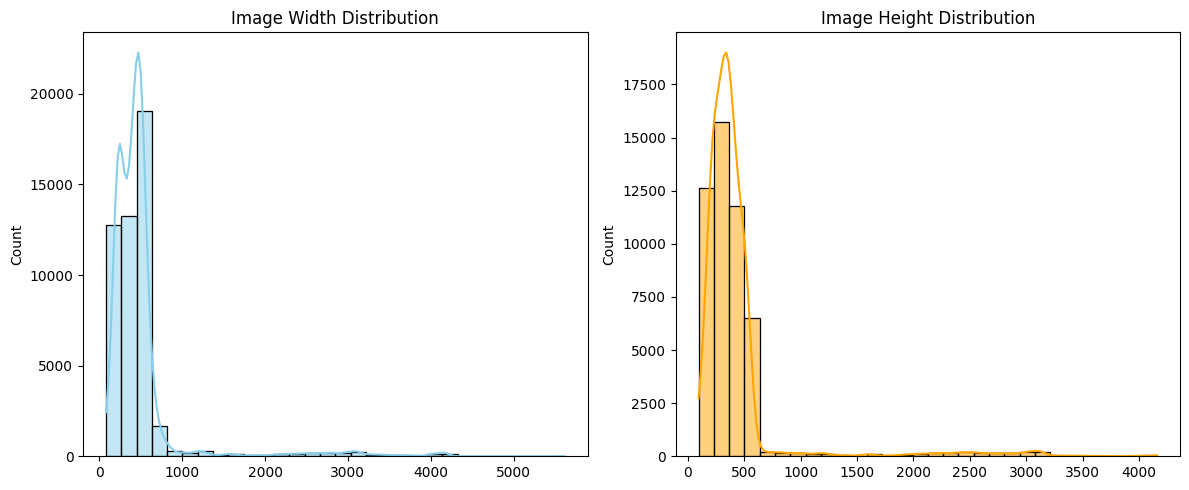

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Set paths
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

# --- Function: Get image counts per class ---
def get_class_counts(folder):
    return {cls: len(os.listdir(os.path.join(folder, cls)))
            for cls in os.listdir(folder) if os.path.isdir(os.path.join(folder, cls))}

# --- Function: Plot bar chart for class distribution ---
def plot_class_distribution(counts, title):
    plt.figure(figsize=(14, 6))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Number of Images")
    plt.xlabel("Class")
    plt.tight_layout()
    plt.show()

# --- 1. Plot class distributions ---
train_counts = get_class_counts(train_dir)
val_counts = get_class_counts(val_dir)
test_counts = get_class_counts(test_dir)

plot_class_distribution(train_counts, "Train Set Class Distribution")
plot_class_distribution(val_counts, "Validation Set Class Distribution")
plot_class_distribution(test_counts, "Test Set Class Distribution")

# --- 2. Show Random Samples ---
def show_random_images(data_dir, num_classes=5):
    class_names = os.listdir(data_dir)
    selected_classes = random.sample(class_names, min(num_classes, len(class_names)))

    plt.figure(figsize=(15, 5))
    for i, cls in enumerate(selected_classes):
        class_path = os.path.join(data_dir, cls)
        if not os.path.isdir(class_path): continue
        sample_image = random.choice(os.listdir(class_path))
        img = Image.open(os.path.join(class_path, sample_image))
        plt.subplot(1, num_classes, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.suptitle("Random Samples from Train Set")
    plt.show()

show_random_images(train_dir, num_classes=5)

# --- 3. Image Size Distribution ---
def get_image_sizes(folder):
    widths, heights = [], []
    for cls in os.listdir(folder):
        cls_path = os.path.join(folder, cls)
        for file in os.listdir(cls_path):
            img_path = os.path.join(cls_path, file)
            try:
                img = Image.open(img_path)
                widths.append(img.size[0])
                heights.append(img.size[1])
            except:
                continue
    return widths, heights

widths, heights = get_image_sizes(train_dir)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(widths, bins=30, kde=True, color='skyblue')
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
sns.histplot(heights, bins=30, kde=True, color='orange')
plt.title("Image Height Distribution")
plt.tight_layout()
plt.show()


##**Image Preprocessing & Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Constants
IMG_SIZE = 224
BATCH_SIZE = 32

# ✅ Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# ✅ Validation and test - only rescale
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Generators
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/val',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # important for metrics
)

# ✅ Show class index mapping
print("\n🔤 Class Index Mapping:")
for cls, idx in train_generator.class_indices.items():
    print(f"{idx}: {cls}")

# ✅ Preview a sample batch
x_batch, y_batch = next(train_generator)
print(f"\n📦 Batch Shape: {x_batch.shape}, Labels Shape: {y_batch.shape}")


Found 31923 images belonging to 32 classes.
Found 7675 images belonging to 32 classes.
Found 7719 images belonging to 32 classes.

🔤 Class Index Mapping:
0: Apple__Healthy
1: Apple__Rotten
2: Banana__Healthy
3: Banana__Rotten
4: Bittergourd__Healthy
5: Bittergourd__Rotten
6: Capsicum__Healthy
7: Capsicum__Rotten
8: Carrot__Healthy
9: Carrot__Rotten
10: Cucumber__Healthy
11: Cucumber__Rotten
12: Grape__Healthy
13: Grape__Rotten
14: Guava__Healthy
15: Guava__Rotten
16: Jujube__Healthy
17: Jujube__Rotten
18: Mango__Healthy
19: Mango__Rotten
20: Okra__Healthy
21: Okra__Rotten
22: Orange__Healthy
23: Orange__Rotten
24: Pomegranate__Healthy
25: Pomegranate__Rotten
26: Potato__Healthy
27: Potato__Rotten
28: Strawberry__Healthy
29: Strawberry__Rotten
30: Tomato__Healthy
31: Tomato__Rotten

📦 Batch Shape: (32, 224, 224, 3), Labels Shape: (32, 32)


### **Merge Duplicate Class Folders (Canonical Label Mapping)**

In [ ]:
import os
import shutil

# ✅ Mapping of old → new class names
MERGE_MAP = {
    # Apple
    'freshapples': 'Apple__Healthy',
    'rottenapples': 'Apple__Rotten',

    # Banana
    'freshbanana': 'Banana__Healthy',
    'rottenbanana': 'Banana__Rotten',

    # Bittergourd
    'freshbittergroud': 'Bittergourd__Healthy',
    'rottenbittergroud': 'Bittergourd__Rotten',

    # Capsicum / Bell Pepper
    'freshcapsicum': 'Capsicum__Healthy',
    'rottencapsicum': 'Capsicum__Rotten',
    'Bellpepper__Healthy': 'Capsicum__Healthy',
    'Bellpepper__Rotten': 'Capsicum__Rotten',

    # Cucumber
    'freshcucumber': 'Cucumber__Healthy',
    'rottencucumber': 'Cucumber__Rotten',

    # Okra
    'freshokra': 'Okra__Healthy',
    'rottenokra': 'Okra__Rotten',

    # Orange
    'freshoranges': 'Orange__Healthy',
    'rottenoranges': 'Orange__Rotten',
    'Orange__Healthy': 'Orange__Healthy',
    'Orange__Rotten': 'Orange__Rotten',

    # Potato
    'freshpotato': 'Potato__Healthy',
    'rottenpotato': 'Potato__Rotten',

    # Tomato
    'freshtomato': 'Tomato__Healthy',
    'rottentomato': 'Tomato__Rotten',
}

# ✅ Dataset directories
DATASETS = ['/content/train', '/content/val', '/content/test']

def merge_classes(dataset_path):
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):
            continue

        # Get new label (if in merge map)
        new_label = MERGE_MAP.get(folder, folder)

        # Skip if already in correct folder
        if folder == new_label:
            continue

        new_label_path = os.path.join(dataset_path, new_label)
        os.makedirs(new_label_path, exist_ok=True)

        # Move all files to new label folder
        for file in os.listdir(folder_path):
            shutil.move(os.path.join(folder_path, file), os.path.join(new_label_path, file))

        # Remove old folder
        shutil.rmtree(folder_path)
        print(f"🔁 Merged '{folder}' ➜ '{new_label}'")

# ✅ Run merging for all datasets
for dataset in DATASETS:
    print(f"\n📂 Merging classes in: {dataset}")
    merge_classes(dataset)

print("\n✅ Class merging completed.")



📂 Merging classes in: /content/train
🔁 Merged 'rottenokra' ➜ 'Okra__Rotten'
🔁 Merged 'freshcapsicum' ➜ 'Capsicum__Healthy'
🔁 Merged 'Bellpepper__Healthy' ➜ 'Capsicum__Healthy'
🔁 Merged 'rottenbanana' ➜ 'Banana__Rotten'
🔁 Merged 'freshapples' ➜ 'Apple__Healthy'
🔁 Merged 'rottenapples' ➜ 'Apple__Rotten'
🔁 Merged 'freshoranges' ➜ 'Orange__Healthy'
🔁 Merged 'rottenbittergroud' ➜ 'Bittergourd__Rotten'
🔁 Merged 'freshtomato' ➜ 'Tomato__Healthy'
🔁 Merged 'rottencucumber' ➜ 'Cucumber__Rotten'
🔁 Merged 'freshcucumber' ➜ 'Cucumber__Healthy'
🔁 Merged 'freshpotato' ➜ 'Potato__Healthy'
🔁 Merged 'freshbanana' ➜ 'Banana__Healthy'
🔁 Merged 'freshokra' ➜ 'Okra__Healthy'
🔁 Merged 'rottenoranges' ➜ 'Orange__Rotten'
🔁 Merged 'rottenpotato' ➜ 'Potato__Rotten'
🔁 Merged 'rottencapsicum' ➜ 'Capsicum__Rotten'
🔁 Merged 'rottentomato' ➜ 'Tomato__Rotten'
🔁 Merged 'freshbittergroud' ➜ 'Bittergourd__Healthy'
🔁 Merged 'Bellpepper__Rotten' ➜ 'Capsicum__Rotten'

📂 Merging classes in: /content/val
🔁 Merged 'rottenokra

##**Model Building**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ Constants
IMG_SIZE = 224

# ✅ Automatically get updated number of classes from the generator (after merging)
NUM_CLASSES = len(train_generator.class_indices)
print(f"🔢 Total Final Classes: {NUM_CLASSES}")

# ✅ Load MobileNetV2 as the base model (without top classifier layers)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False  # Freeze base layers to speed up training

# ✅ Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# ✅ Final model
model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Model summary
model.summary()


🔢 Total Final Classes: 32
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,426,080 (9.25 MB)

 Trainable params: 168,096 (656.62 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

###**Training & Evaluation**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# ✅ Callbacks
checkpoint_cb = ModelCheckpoint(
    filepath="best_model.h5",           # ✅ Stored in Colab temp storage
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor="val_loss",
    patience=3,                         # ⛔ Stop training if no improvement for 3 epochs
    restore_best_weights=True,
    verbose=1
)

# ✅ Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,                          # You can increase to 25–30 if needed
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

# ✅ Load the best model (auto-saved during training)
model = load_model("best_model.h5")

# ✅ Final evaluation on the test set
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"\n✅ Final Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
161/998 ━━━━━━━━━━━━━━━━━━━━ 7:48 560ms/step - accuracy: 0.1256 - loss: 3.3115

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.3662 - loss: 2.3330
Epoch 1: val_accuracy improved from -inf to 0.83244, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 611s 601ms/step - accuracy: 0.3664 - loss: 2.3323 - val_accuracy: 0.8324 - val_loss: 0.6527
Epoch 2/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.7328 - loss: 0.8991
Epoch 2: val_accuracy improved from 0.83244 to 0.88651, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 576s 577ms/step - accuracy: 0.7329 - loss: 0.8990 - val_accuracy: 0.8865 - val_loss: 0.4122
Epoch 3/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.8051 - loss: 0.6578
Epoch 3: val_accuracy improved from 0.88651 to 0.90958, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 616s 571ms/step - accuracy: 0.8051 - loss: 0.6578 - val_accuracy: 0.9096 - val_loss: 0.3174
Epoch 4/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.8368 - loss: 0.5389
Epoch 4: val_accuracy improved from 0.90958 to 0.91752, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 540s 541ms/step - accuracy: 0.8368 - loss: 0.5389 - val_accuracy: 0.9175 - val_loss: 0.2828
Epoch 5/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.8550 - loss: 0.4691
Epoch 5: val_accuracy improved from 0.91752 to 0.92860, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 534s 535ms/step - accuracy: 0.8550 - loss: 0.4690 - val_accuracy: 0.9286 - val_loss: 0.2445
Epoch 6/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.8673 - loss: 0.4301
Epoch 6: val_accuracy improved from 0.92860 to 0.93511, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 537s 538ms/step - accuracy: 0.8673 - loss: 0.4301 - val_accuracy: 0.9351 - val_loss: 0.2173
Epoch 7/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8840 - loss: 0.3833
Epoch 7: val_accuracy improved from 0.93511 to 0.93720, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 578s 579ms/step - accuracy: 0.8840 - loss: 0.3833 - val_accuracy: 0.9372 - val_loss: 0.2060
Epoch 8/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.8892 - loss: 0.3541
Epoch 8: val_accuracy improved from 0.93720 to 0.93915, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 539s 541ms/step - accuracy: 0.8892 - loss: 0.3541 - val_accuracy: 0.9392 - val_loss: 0.1903
Epoch 9/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.8967 - loss: 0.3320
Epoch 9: val_accuracy improved from 0.93915 to 0.94267, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 547s 548ms/step - accuracy: 0.8967 - loss: 0.3320 - val_accuracy: 0.9427 - val_loss: 0.1821
Epoch 10/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.8985 - loss: 0.3185
Epoch 10: val_accuracy improved from 0.94267 to 0.94853, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 562s 563ms/step - accuracy: 0.8985 - loss: 0.3185 - val_accuracy: 0.9485 - val_loss: 0.1666
Epoch 11/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9066 - loss: 0.3025
Epoch 11: val_accuracy improved from 0.94853 to 0.94958, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 556s 557ms/step - accuracy: 0.9066 - loss: 0.3025 - val_accuracy: 0.9496 - val_loss: 0.1592
Epoch 12/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.9127 - loss: 0.2849
Epoch 12: val_accuracy improved from 0.94958 to 0.94984, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 589s 590ms/step - accuracy: 0.9127 - loss: 0.2849 - val_accuracy: 0.9498 - val_loss: 0.1562
Epoch 13/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9096 - loss: 0.2793
Epoch 13: val_accuracy improved from 0.94984 to 0.95309, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 538s 539ms/step - accuracy: 0.9097 - loss: 0.2793 - val_accuracy: 0.9531 - val_loss: 0.1432
Epoch 14/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.9155 - loss: 0.2695
Epoch 14: val_accuracy improved from 0.95309 to 0.95505, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 536s 537ms/step - accuracy: 0.9155 - loss: 0.2695 - val_accuracy: 0.9550 - val_loss: 0.1408
Epoch 15/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.9212 - loss: 0.2473
Epoch 15: val_accuracy improved from 0.95505 to 0.95635, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 550s 551ms/step - accuracy: 0.9212 - loss: 0.2473 - val_accuracy: 0.9564 - val_loss: 0.1384
Epoch 16/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.9214 - loss: 0.2453
Epoch 16: val_accuracy improved from 0.95635 to 0.95661, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 563s 553ms/step - accuracy: 0.9214 - loss: 0.2453 - val_accuracy: 0.9566 - val_loss: 0.1326
Epoch 17/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.9228 - loss: 0.2410
Epoch 17: val_accuracy improved from 0.95661 to 0.95792, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 547s 548ms/step - accuracy: 0.9228 - loss: 0.2410 - val_accuracy: 0.9579 - val_loss: 0.1310
Epoch 18/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.9301 - loss: 0.2217
Epoch 18: val_accuracy did not improve from 0.95792
998/998 ━━━━━━━━━━━━━━━━━━━━ 544s 545ms/step - accuracy: 0.9301 - loss: 0.2217 - val_accuracy: 0.9577 - val_loss: 0.1278
Epoch 19/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9313 - loss: 0.2186
Epoch 19: val_accuracy improved from 0.95792 to 0.96065, saving model to best_model.h5


998/998 ━━━━━━━━━━━━━━━━━━━━ 534s 535ms/step - accuracy: 0.9313 - loss: 0.2186 - val_accuracy: 0.9607 - val_loss: 0.1230
Epoch 20/20
998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.9332 - loss: 0.2113
Epoch 20: val_accuracy did not improve from 0.96065
998/998 ━━━━━━━━━━━━━━━━━━━━ 538s 539ms/step - accuracy: 0.9332 - loss: 0.2113 - val_accuracy: 0.9607 - val_loss: 0.1213
Restoring model weights from the end of the best epoch: 20.


242/242 ━━━━━━━━━━━━━━━━━━━━ 59s 221ms/step - accuracy: 0.9727 - loss: 0.0942

✅ Final Test Accuracy: 95.93%


**Training History**

/tmp/ipython-input-9-554815787.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


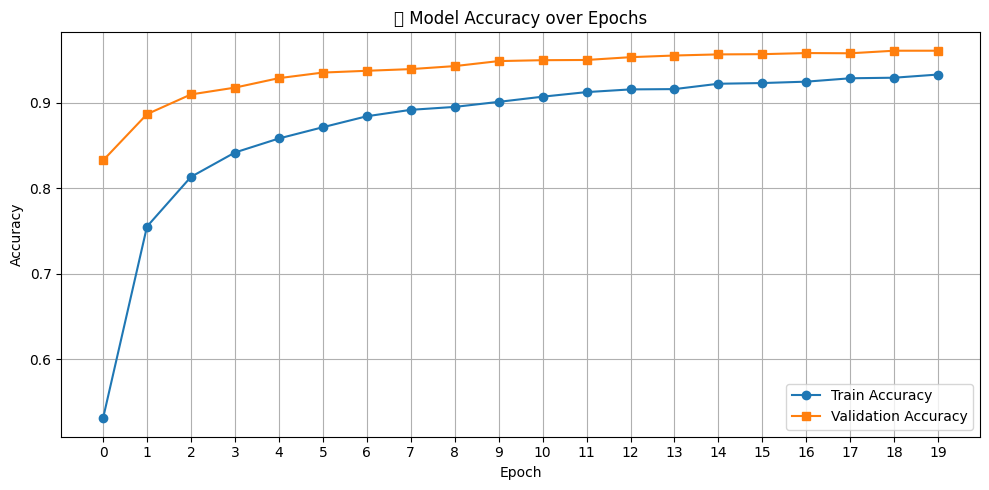

/tmp/ipython-input-9-554815787.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


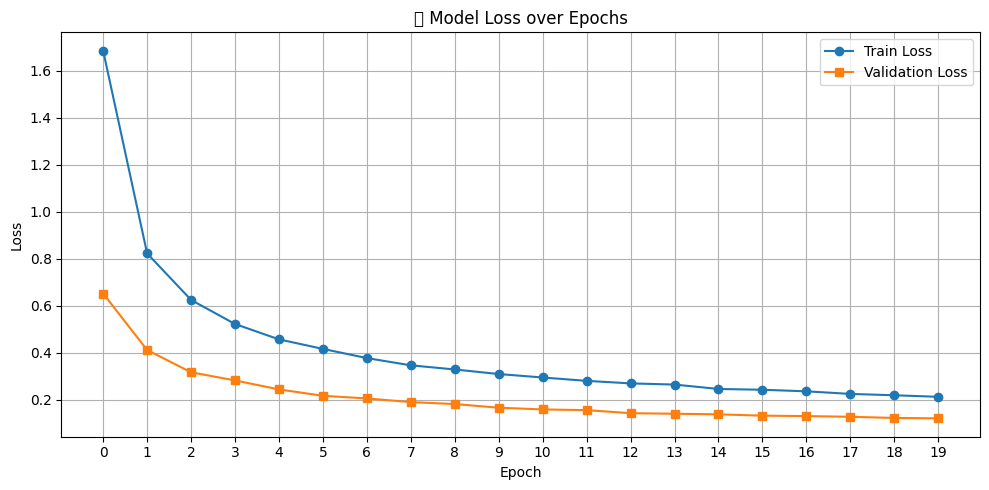

In [ ]:
import matplotlib.pyplot as plt

# Get number of epochs from history
epochs_ran = len(history.history['accuracy'])

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 's-', label='Validation Accuracy')
plt.title('📈 Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(epochs_ran))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'o-', label='Train Loss')
plt.plot(history.history['val_loss'], 's-', label='Validation Loss')
plt.title('📉 Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(epochs_ran))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fruit_veg_model.keras')


Mounted at /content/drive


242/242 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step


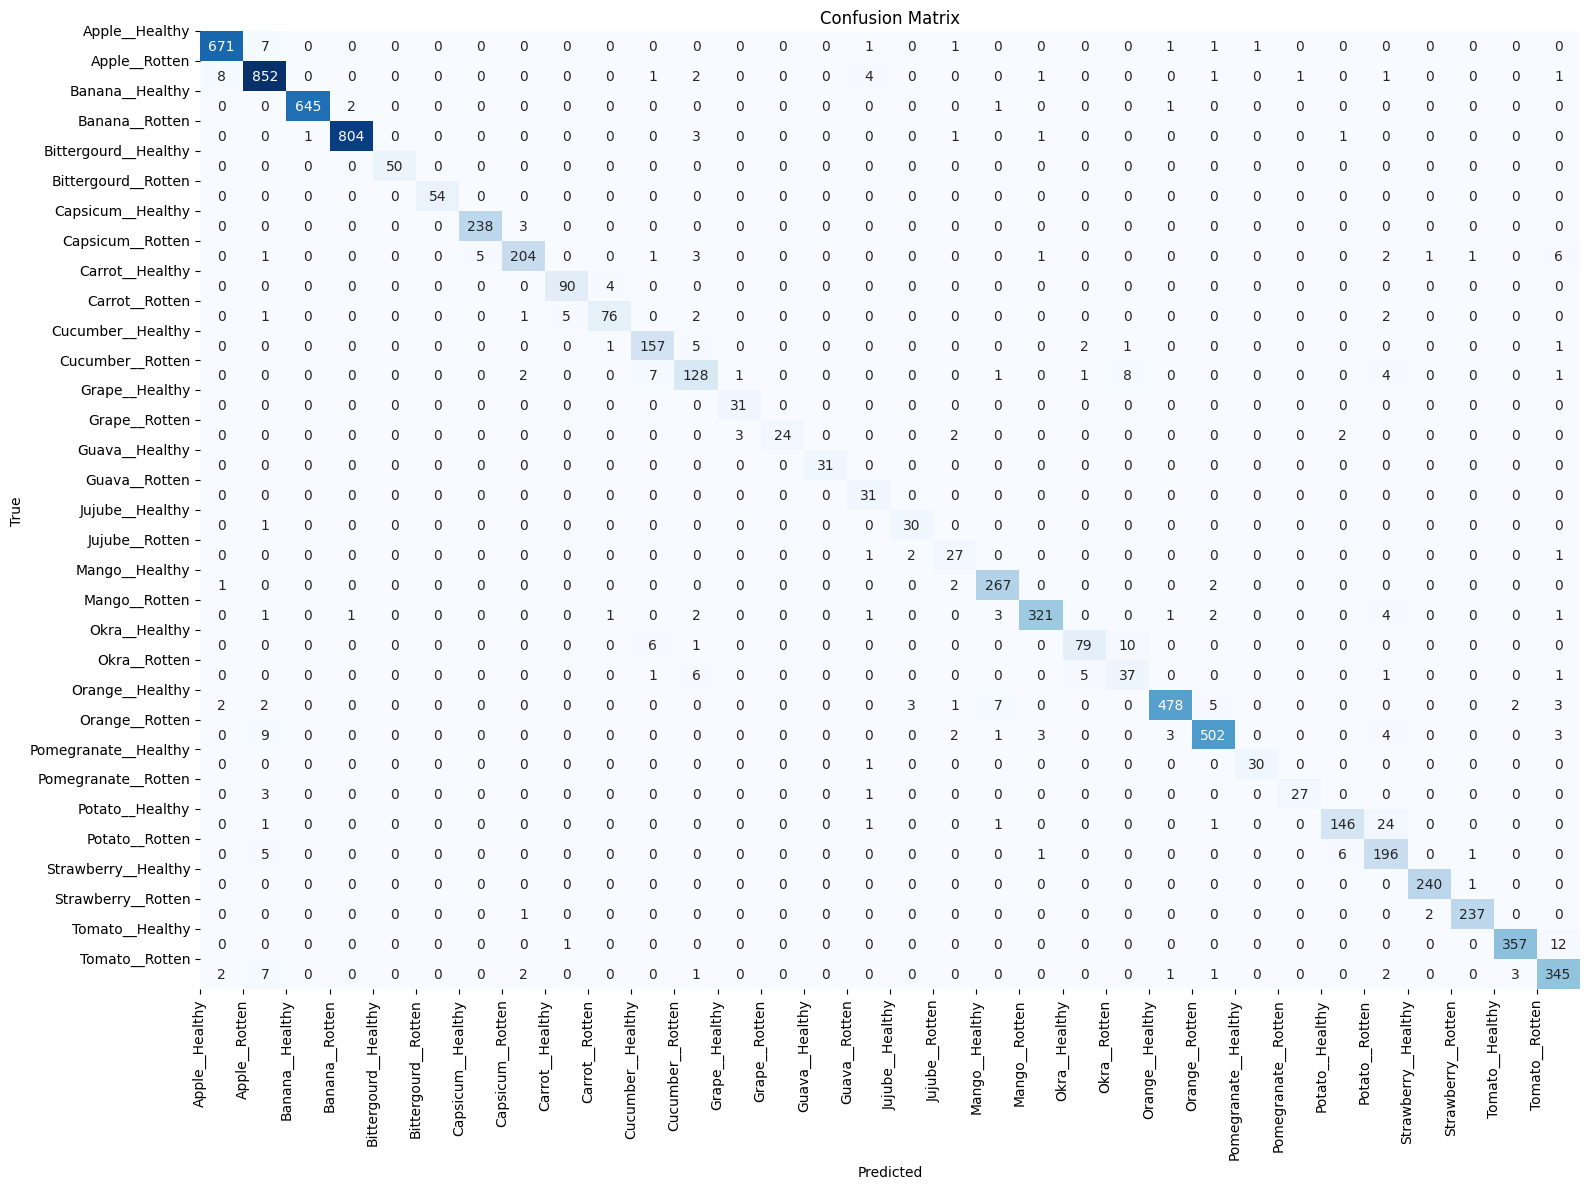

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true and predicted labels
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# ✅ Properly set axis labels
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels, rotation=90)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels, rotation=0)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/fruit_veg_model.keras')


Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
# Save correct app.py
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# ✅ Load trained model
model = load_model("/content/drive/MyDrive/fruit_veg_model.keras")

# ✅ Define class labels
class_labels = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten',
                'Bittergourd__Healthy', 'Bittergourd__Rotten', 'Capsicum__Healthy', 'Capsicum__Rotten',
                'Cucumber__Healthy', 'Cucumber__Rotten', 'Okra__Healthy', 'Okra__Rotten',
                'Orange__Healthy', 'Orange__Rotten', 'Potato__Healthy', 'Potato__Rotten',
                'Tomato__Healthy', 'Tomato__Rotten', 'Grape__Healthy', 'Grape__Rotten',
                'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten',
                'Mango__Healthy', 'Mango__Rotten', 'Pomegranate__Healthy', 'Pomegranate__Rotten',
                'Strawberry__Healthy', 'Strawberry__Rotten', 'Carrot__Healthy', 'Carrot__Rotten']

# ✅ Streamlit config
st.set_page_config(page_title="Fruit & Veg Classifier", layout="centered")
st.title("🍎 Rotten or Fresh? Fruit & Vegetable Classifier")

# ✅ Upload images
uploaded_files = st.file_uploader("📤 Upload one or more images", type=["jpg", "jpeg", "png"], accept_multiple_files=True)

# ✅ Camera support
camera_image = st.camera_input("📸 Or take a picture")

# ✅ Combine uploaded + camera
all_inputs = uploaded_files if uploaded_files else []
if camera_image is not None:
    all_inputs.append(camera_image)

# ✅ Prediction block
if all_inputs:
    for uploaded_file in all_inputs:
        img = Image.open(uploaded_file).convert("RGB")
        st.image(img, caption="📷 Uploaded Image", use_column_width=True)

        img_resized = img.resize((224, 224))
        img_array = image.img_to_array(img_resized) / 255.0
        img_batch = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_batch)
        class_idx = int(np.argmax(prediction))
        confidence = float(np.max(prediction) * 100)

        st.markdown(f"### 🔍 Predicted: `{class_labels[class_idx]}`")
        st.markdown(f"🧠 Confidence: **{confidence:.2f}%**")
        st.markdown("---")
''')


In [7]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.55.159.101:8501

  Stopping...
  Stopping...
